Generating Fake Audio using AcademiCodec: https://github.com/yangdongchao/AcademiCodec

In [1]:
import os
import torch
import torchaudio
from academicodec.models.hificodec.vqvae_tester import VqvaeTester

# Set paths
config_path = "/data/lekha_codec_model_files/AcademiCodec/egs/HiFi-Codec-24k-240d/config_24k_240d.json"
model_path = "/data/lekha_codec_model_files/AcademiCodec/egs/HiFi-Codec-24k-240d/model.pt"
audio_path = "sample_9.wav"
output_path = "academicodec_reconstructed_audio.wav"

# Initialize the VqvaeTester
vqvae_tester = VqvaeTester(config_path, model_path, sample_rate=24000)
vqvae_tester.cuda()  # Move to GPU if available

# Extract features/latents
fid, vq_codes = vqvae_tester.vq(audio_path)
print(f"Extracted features for file: {fid}")
print(f"Shape of extracted features: {vq_codes.shape}")

# Regenerate audio from features
_, reconstructed_audio = vqvae_tester.forward(audio_path)

# Convert to CPU and remove batch dimension
reconstructed_audio = reconstructed_audio.cpu().squeeze(0)

# Save the reconstructed audio
torchaudio.save(output_path, reconstructed_audio, 24000)
print(f"Reconstructed audio saved to: {output_path}")


/home/lekhab/AudioDeepfake/AcademiCodec/academicodec/models/hificodec/vqvae.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path)
/home/lekhab/.c

Extracted features for file: sample_9
Shape of extracted features: torch.Size([1, 1000, 4])
Reconstructed audio saved to: academicodec_reconstructed_audio1.wav


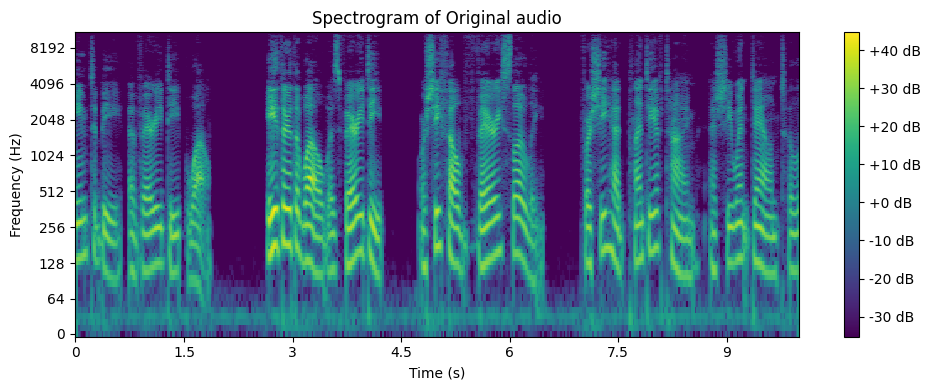

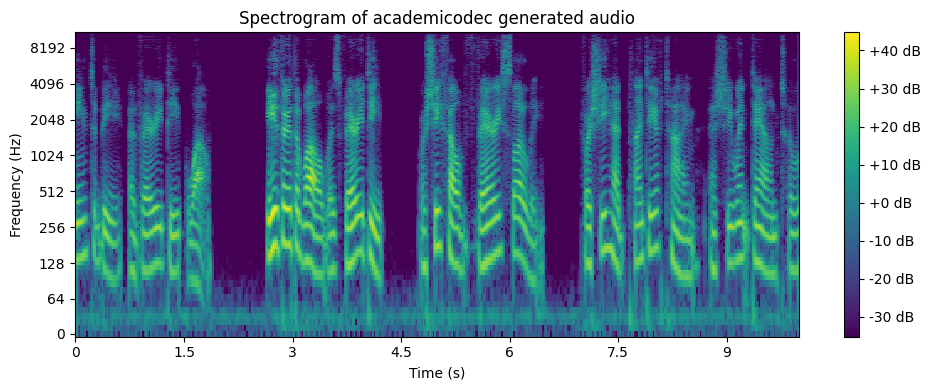

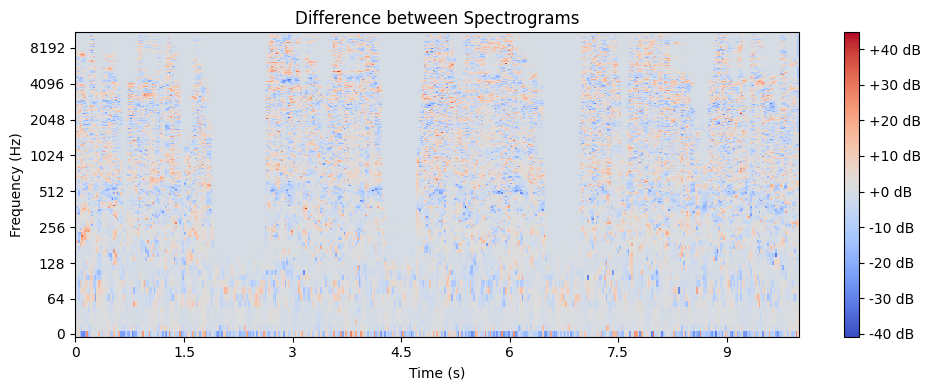

In [3]:
#Create spectograms for input and output audio files

import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram(audio_file, title):
    # Load the audio file
    y, sr = librosa.load(audio_file)
    
    # Compute the STFT and convert to decibel scale
    stft = librosa.stft(y)
    spectrogram = librosa.amplitude_to_db(abs(stft))
    
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()



def plot_spectrogram_difference(audio_file1, audio_file2):
    # Load and compute spectrograms for both audio files
    y1, sr1 = librosa.load(audio_file1)
    y2, sr2 = librosa.load(audio_file2)
    
    if sr1 != sr2:
        raise ValueError("Sample rates of the two audio files do not match. Please resample to the same rate.")
    
    # Compute the STFT for both signals
    stft1 = librosa.stft(y1)
    stft2 = librosa.stft(y2)
    
    # Convert to decibel scale
    spectrogram1 = librosa.amplitude_to_db(abs(stft1))
    spectrogram2 = librosa.amplitude_to_db(abs(stft2))
    
    # Compute the difference between the two spectrograms
    spectrogram_diff = spectrogram1 - spectrogram2
    
    # Plot the difference
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_diff, sr=sr1, x_axis='time', y_axis='log', cmap='coolwarm')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Difference between Spectrograms")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()

# File paths for the two audio files
audio_file1 = 'sample_9.wav'  # original audio
audio_file2 = 'academicodec_reconstructed_audio.wav'  # output audio file from dac

# Plot spectrograms for both files
plot_spectrogram(audio_file1, title="Spectrogram of Original audio")
plot_spectrogram(audio_file2, title="Spectrogram of academicodec generated audio")
plot_spectrogram_difference(audio_file1, audio_file2)